In [1]:
"""Example of the optimization process for SGOOP.  Here we find the weights of cos(phi),sin(phi),cos(psi),sin(psi)
for alanine dipeptide in vacuum from an unbiased trajectory.  We use the cos and sin of dihedral angles to avoid
inaccuracy caused by the discontinuity of angles (pi = -pi)."""
import sgoop
import scipy.optimize as opt
import numpy as np
import time
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

In [2]:
def opti_func(rc):
    global nfev
    nfev +=1
    return -sgoop.rc_eval(rc)

In [3]:
def print_fun(x, f, accepted):
    global now,last,nfev,lastf
    now=time.time()
    print(x,end=' ')
    if accepted == 1:
        print("with spectral gap %.4f accepted after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    else:
        print("with spectral gap %.4f declined after %3i runs (%.3f)" % (-f, nfev-lastf, now-last))
    last=now
    lastf=nfev

In [4]:
# Calculating the optimal 2 well RC.
sgoop.wells = 2
start = time.time()
last = start
lastf = nfev = 0
minimizer_kwargs = {"options": {"maxiter":10}}
ret = opt.basinhopping(opti_func,[-1,-1,1,1],niter=100,T=.01,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
end = time.time()
print(end-start)
ret

[-0.958 -1.081  0.973  1.028] with spectral gap 0.0761 accepted after  12 runs (4.495)
[-0.984 -1.141  0.946  1.108] with spectral gap 0.0725 declined after   6 runs (2.103)
[-0.897 -1.142  0.910  0.960] with spectral gap 0.0768 accepted after   6 runs (2.059)
[-0.882 -1.112  0.912  1.032] with spectral gap 0.0732 declined after   6 runs (2.183)
[-0.803 -1.164  0.944  0.967] with spectral gap 0.0771 accepted after   6 runs (2.279)
[-0.718 -1.131  0.861  0.972] with spectral gap 0.0727 declined after   6 runs (2.173)
[-0.727 -1.122  0.946  1.056] with spectral gap 0.0738 declined after   6 runs (2.138)
[-0.805 -1.168  1.035  0.917] with spectral gap 0.0829 accepted after   6 runs (2.098)
[-0.827 -1.091  0.985  0.828] with spectral gap 0.0867 accepted after   6 runs (2.119)
[-0.856 -1.142  0.987  0.791] with spectral gap 0.0894 accepted after   6 runs (2.247)
[-0.838 -1.216  0.946  0.708] with spectral gap 0.0911 accepted after   6 runs (2.179)
[-0.863 -1.245  1.023  0.768] with spectral

[-1.444 -1.325  1.423  0.885] with spectral gap 0.1023 accepted after   6 runs (2.139)
[-1.487 -1.330  1.380  0.798] with spectral gap 0.1051 accepted after   6 runs (2.068)
[-1.539 -1.347  1.453  0.692] with spectral gap 0.1111 accepted after   6 runs (2.029)
[-1.515 -1.346  1.555  0.590] with spectral gap 0.1172 accepted after   6 runs (2.087)
[-1.558 -1.346  1.463  0.541] with spectral gap 0.1181 accepted after   6 runs (2.014)
215.41486310958862


                        fun: -0.12063384792849585
 lowest_optimization_result:       fun: -0.12063384792849585
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.000,  0.000,  0.000,  0.000])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-1.159, -1.243,  1.334,  0.453])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 606
                        nit: 100
                       njev: 101
                          x: array([-1.159, -1.243,  1.334,  0.453])

[10.308952660644293 7.600902459542082 6.032286541628237 4.422848629194137
 3.0186597781976956 2.1252760780236355 1.9116697659006125
 2.298593071724508 2.942507512316693 3.4652027116380677 3.6743193027826067
 3.3892688107968816 2.8444428260077648 2.32687778556309 2.0201668502173638
 2.3454925940053224 3.400197881329072 5.025748931906304 6.645391014514646
 10.308952660644293]


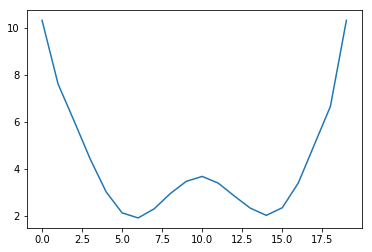

In [9]:
# Checking self-consistency.
p=sgoop.md_prob(ret.x)
plt.plot(-np.ma.log(p))
print(-np.ma.log(p))
# This is self-consistent

In [10]:
# Calculating the optimal 3 well RC.
sgoop.wells = 3
start = time.time()
last = start
lastf = nfev = 0
minimizer_kwargs = {"options": {"maxiter":10}}
ret = opt.basinhopping(opti_func,[-1,-1,1,1],niter=100,T=.01,stepsize=.1, minimizer_kwargs=minimizer_kwargs, callback=print_fun)
end = time.time()
print(end-start)
ret

[-1.097 -0.954  1.014  1.031] with spectral gap 0.0685 declined after  12 runs (4.327)
[-0.983 -0.926  0.977  0.921] with spectral gap 0.0704 accepted after   6 runs (2.096)
[-0.939 -0.857  0.982  0.849] with spectral gap 0.0710 accepted after   6 runs (2.209)
[-0.973 -0.843  1.071  0.783] with spectral gap 0.0691 accepted after   6 runs (2.092)
[-0.875 -0.941  1.153  0.815] with spectral gap 0.0727 accepted after   6 runs (2.134)
[-0.864 -0.962  1.194  0.854] with spectral gap 0.0718 declined after   6 runs (2.113)
[-0.867 -0.955  1.221  0.850] with spectral gap 0.0714 declined after   6 runs (2.102)
[-0.830 -0.958  1.223  0.901] with spectral gap 0.0719 accepted after   6 runs (2.039)
[-0.814 -1.054  1.177  0.945] with spectral gap 0.0748 accepted after   6 runs (2.064)
[-0.880 -1.088  1.178  0.947] with spectral gap 0.0752 accepted after   6 runs (2.186)
[-0.843 -1.108  1.087  0.963] with spectral gap 0.0746 accepted after   6 runs (2.251)
[-0.747 -1.088  1.121  1.036] with spectral

[-0.484 -1.084  1.038  2.425] with spectral gap 0.0631 accepted after   6 runs (2.013)
[-0.592 -1.151  0.993  2.458] with spectral gap 0.0611 declined after   6 runs (1.963)
[-0.554 -1.042  1.057  2.327] with spectral gap 0.0630 accepted after   6 runs (1.963)
[-0.579 -0.992  0.950  2.335] with spectral gap 0.0603 accepted after   6 runs (1.929)
[-0.602 -1.072  1.022  2.448] with spectral gap 0.0611 accepted after   6 runs (1.897)
199.41764497756958


                        fun: -0.0767703390306036
 lowest_optimization_result:       fun: -0.0767703390306036
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 0.000,  0.000,  0.000,  0.000])
  message: 'Optimization terminated successfully.'
     nfev: 6
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-0.633, -1.081,  1.082,  0.969])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 606
                        nit: 100
                       njev: 101
                          x: array([-0.633, -1.081,  1.082,  0.969])

[8.006367567650246 7.173458444715143 5.233778845410465 3.9187119935789427
 3.061872076058536 2.6136495256807257 2.3976286416809396 2.434213535472482
 2.6673882193833203 3.028255465259551 3.4641371814360293
 3.8335199439402023 4.160484364726646 3.989984546897858 3.553183738660037
 2.7308071882248264 1.791959489230722 1.7052148678278691
 3.5767419541770864 10.308952660644293]


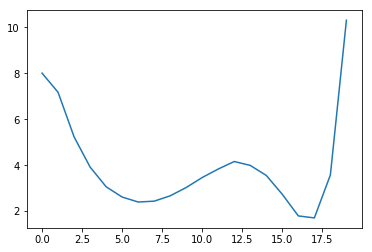

In [11]:
# Checking for self-consistency.
p=sgoop.md_prob(ret.x)
plt.plot(-np.ma.log(p))
print(-np.ma.log(p))
#This is NOT self-consistent.  We use the 2 well RC!